In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import fonction_stage as st

**Notebook - étude de la géométrie de modèle destinée à EFISPEC3D, avec les contraintes de maillage**

**I - Les paramètres connus**

In [2]:
n=2      #nombre de couches 
Vp=(360.0,0) 
Vs=(175,0)
rho=(1.6,0)
h=(10,0)  #0= à calculer


In [3]:
#tableau panda
tab=pd.DataFrame({'Vp (m/s)': [Vp[0], Vp[1]], 'Vs (m/s)': [Vs[0], Vs[1]], 'rho (g/cm3)':[rho[0], rho[1]], 'h (m)':[h[0], h[1]]}, index=['Couche 1', 'Couche 2'])
print(tab)

          Vp (m/s)  Vs (m/s)  rho (g/cm3)  h (m)
Couche 1     360.0       175          1.6     10
Couche 2       0.0         0          0.0      0


**II - Géométrie pour eviter les artefacts**


L'onde reflechis sur les bords du modèle ne dois pas revenir dans le temps de la simulation


In [4]:
tsimu=0.6#temps de la simulation 
Vmax=np.max(Vp) #plus grande vitesse
print('\033[2;30;49mVmax=', Vmax)

Vmax= 360.0


Il faut avoir une idées de la disposition de la source et des recepteurs

In [5]:
x1=5 #(m) distance source - 1er recepteur
nb=24 # nombre de recepteur
dx=1 #(m) espacement recpteurs 

L=(nb*dx)-1+x1 #(m) taille de dispositif avec source =0
print('\033[2;34;49mL=',L,"\033[2;34;49mm")

recepx=np.arange(x1,L+1,dx)
recepy=np.linspace(0,0,L+1-x1)


L= 28 m


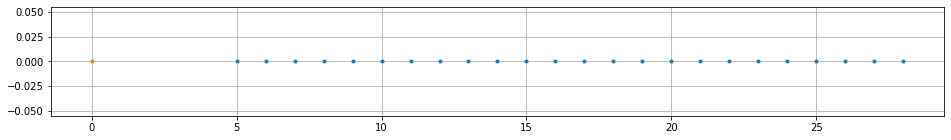

In [6]:
#représentation graphique 
plt.figure(figsize=(16,2))
plt.plot(recepx,recepy,'.')
sourcex=0
sourcey=0
plt.plot(sourcex,sourcey,'.')
plt.grid()

In [7]:
# en Z trajet le plus court source-source
z=(Vmax*tsimu)/2
z=z-98
y=2*z
xneg=z
xpos=z+L
x=xneg+xpos
print('\033[2;34;49mx=',x, 'm')
print('\033[2;34;49my=',y, 'm')
print('\033[2;34;49mz=',z, 'm')


x= 48.0 m
y= 20.0 m
z= 10.0 m


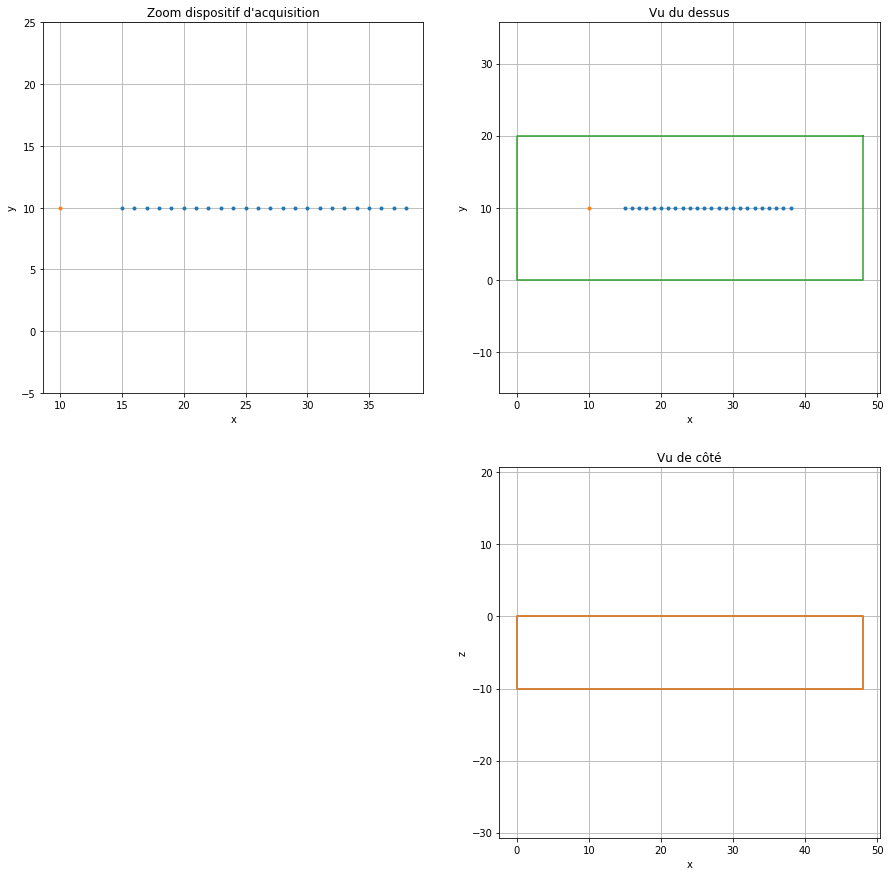

In [8]:
#représentation 
h1=h[0]
st.geom(x,y,z,h1,recepx,xneg,recepy)

In [9]:
tab=pd.DataFrame({'Vp (m/s)': [Vp[0], Vp[1]], 'Vs (m/s)': [Vs[0], Vs[1]], 'rho (g/cm3)':[rho[0], rho[1]], 'h (m)':[h[0],z]}, index=['Couche 1', 'Couche 2'])
print(tab)

          Vp (m/s)  Vs (m/s)  rho (g/cm3)  h (m)
Couche 1     360.0       175          1.6   10.0
Couche 2       0.0         0          0.0   10.0


**III - Maillage**


In [10]:
#quel est la fréquence max pour la quel on veux du signal ?
fmax=150 #Hz

#la plus petite longueur d'onde S de la couche 1
wlmin1=Vs[0]/fmax

print("\033[2;30;49mVs min couche 1 =", Vs[0], 'm/s')
print("\033[2;30;49mPlus petite longueur d'onde =", wlmin1, 'm')
print ("\033[2;34;49mdonc taille MAX de la maille de la couche 1 =",  wlmin1, 'm', "pour eviter l'alising")


Vs min couche 1 = 175 m/s
Plus petite longueur d'onde = 1.1666666666666667 m
donc taille MAX de la maille de la couche 1 = 1.1666666666666667 m pour eviter l'alising


In [11]:
#couche 1
maille1=wlmin1    #ou moins
maille1=1

print('\033[2;30;49mnb de maille en z=', 144/maille1)
print('\033[2;30;49mmodulo', 144%maille1)

print('\033[2;30;49mnb de maille en x=', x/maille1)
print('\033[2;30;49mmodulo', x%maille1)

print('\033[2;30;49mnb de maille en y=', y/maille1)
print('\033[2;30;49mmodulo', y%maille1)


nb de maille en z= 144.0
modulo 0
nb de maille en x= 48.0
modulo 0.0
nb de maille en y= 20.0
modulo 0.0


In [12]:
print ('\033[2;34;49mMaille couche 1 =', maille1, 'm')


Maille couche 1 = 1 m


**IV- Source**

La source de type Ricker implementé dans EFISPEC :
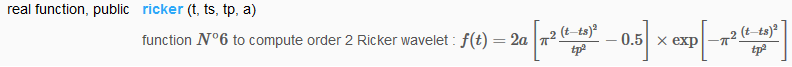

fmax = 3 x f0 pour cette fonction

tp= 0.02
f1= 50.0


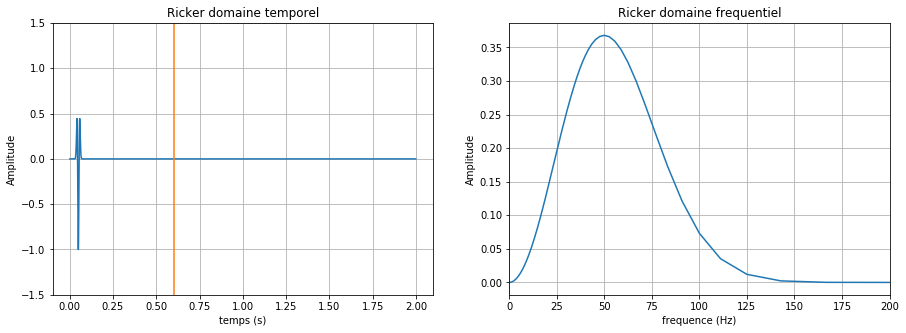

In [13]:
fp=fmax/3
tp = 1/fp
print('\033[2;30;49mtp=',tp)
#fonction de Ricker centré sur f0
#en orange la fin de la simulation 
st.ricker(tp,tsimu=tsimu,ts=0.05,grafmax=200)


**V - Temps de calcul EFISPEC**
 

In [14]:
#time step 

n0=0.29 #nombre de courant
dt=(n0*(maille1/5))/Vmax

print("\033[2;34;49mPas de temps simulation =", dt)

Pas de temps simulation = 0.0001611111111111111


In [15]:
#si on garde la même configuration 1 noeud 24 coeurs
average_time=0.29*10**-4     #par time step et par hexahedron !A vérifié!
nb_coeurs=24

#A modifier
total_hexa=x*y*z/(maille1)**3
#total_hexa=   avec Cubit
nb_timestep=tsimu/dt

temps_calcul= (average_time*total_hexa*nb_timestep)/nb_coeurs
print('\033[2;30;49mtemps de calcul =', temps_calcul, '(s)')
print('\033[2;30;49mtemps de calcul =', temps_calcul/60, '(min)')
print('\033[2;30;49mtemps de calcul =', (temps_calcul/60)/60, '(h)')
print('\033[2;34;49mnb hexa =', total_hexa)
print('\033[2;34;49mnb pas de temps =', nb_timestep)

temps de calcul = 43.199999999999996 (s)
temps de calcul = 0.72 (min)
temps de calcul = 0.012 (h)
nb hexa = 9600.0
nb pas de temps = 3724.137931034483
